In [1]:
# article: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0206300

library(tidyverse)
library(dplyr)

download.file("https://ndownloader.figshare.com/files/13351808", "dataFile.xlsx", mode = "wb")
d = readxl::read_xlsx("dataFile.xlsx")

print("made it to checkpoint a")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "made it to checkpoint a"


In [2]:
# grab all rows where Order equals 1 or 0 
proactive = dplyr::filter(d, Order == "1") # Proactive
reactive = filter(d, Order == "0") # Reactive

print("made it to checkpoint b")

[1] "made it to checkpoint b"


In [3]:
# grab all rows where trial = 1, 2, or 3
proactive1 = filter(proactive, `Information Round` == "1") # no information
proactive2 = filter(proactive, `Information Round` == "2") # positive information
proactive3 = filter(proactive, `Information Round` == "3") # negative information

reactive1 = filter(reactive, `Information Round` == "1") # no information
reactive2 = filter(reactive, `Information Round` == "2") # positive information
reactive3 = filter(reactive, `Information Round` == "3") # negative inofrmation

print("made it to checkpoint c")

[1] "made it to checkpoint c"


In [4]:
# gather the "percent changes" for the 6 categories of Proactive

# noInfoProactivePercent **********************************************
proactive1NonGM = mutate(proactive1, diff = GM - NonGM)
proactive1Unlabeled = mutate(proactive1, diff = GM - NoLabel)

proactive1NonGMChange = pull(proactive1NonGM, diff)
b = proactive1NonGMChange >= 0
noInfoProactiveNonGMPercent = sum(b) / length(b)               # non-GM

proactive1UnlabledChange = pull(proactive1Unlabeled, diff)
b = proactive1UnlabledChange >= 0
noInfoProactiveUnlabledPercent = sum(b) / length(b)            # unlabled

# positiveInfoProactivePercent **********************************************
proactive2NonGM = mutate(proactive2, diff = GM - NonGM)
proactive2Unlabeled = mutate(proactive2, diff = GM - NoLabel)

proactive2NonGMChange = pull(proactive2NonGM, diff)
b = proactive2NonGMChange >= 0
positiveInfoProactiveNonGMPercent = sum(b) / length(b)        # non-GM

proactive2UnlabledChange = pull(proactive2Unlabeled, diff)
b = proactive2UnlabledChange >= 0
positiveInfoProactiveUnlabledPercent = sum(b) / length(b)     # unlabled


# negativeInfoProactivePercent **********************************************
proactive3NonGM = mutate(proactive3, diff = GM - NonGM)
proactive3Unlabeled = mutate(proactive3, diff = GM - NoLabel)

proactive3NonGMChange = pull(proactive3NonGM, diff)
b = proactive3NonGMChange >= 0
negativeInfoProactiveNonGMPercent = sum(b) / length(b)        # non-GM

proactive3UnlabledChange = pull(proactive3Unlabeled, diff)
b = proactive3UnlabledChange >= 0
negativeInfoProactiveUnlabledPercent = sum(b) / length(b)     # unlabled

print("made it to checkpoint d")

[1] "made it to checkpoint d"


In [11]:
# gather the "percent changes" for the 6 categories of Reactive

# noInfoReactivePercent **********************************************
reactive1NonGM = mutate(reactive1, diff = GM - NonGM)
reactive1Unlabeled = mutate(reactive1, diff = GM - NoLabel)

reactive1NonGMChange = pull(reactive1NonGM, diff)
b = reactive1NonGMChange >= 0
noInfoReactiveNonGMPercent = sum(b) / length(b)              # non-GM

reactive1UnlabledChange = pull(reactive1Unlabeled, diff)
b = reactive1UnlabledChange >= 0
noInfoReactiveUnlabledPercent = sum(b) / length(b)           # unlabled

# positiveInforeactivePercent **********************************************
reactive3NonGM = mutate(reactive3, diff = GM - NonGM)
reactive3Unlabeled = mutate(reactive3, diff = GM - NoLabel)

reactive3NonGMChange = pull(reactive3NonGM, diff)
b = reactive3NonGMChange >= 0
positiveInfoReactiveNonGMPercent = sum(b) / length(b)        # non-GM

reactive3UnlabledChange = pull(reactive3Unlabeled, diff)
b = reactive3UnlabledChange >= 0
positiveInfoReactiveUnlabledPercent = sum(b) / length(b)     # unlabled


# negativeInforeactivePercent **********************************************
reactive2NonGM = mutate(reactive2, diff = GM - NonGM)
reactive2Unlabeled = mutate(reactive2, diff = GM - NoLabel)

reactive2NonGMChange = pull(reactive2NonGM, diff)
b = reactive2NonGMChange >= 0
negativeInfoReactiveNonGMPercent = sum(b) / length(b)       # non-GM

reactive2UnlabledChange = pull(reactive2Unlabeled, diff)
b = reactive2UnlabledChange >= 0
negativeInfoReactiveUnlabledPercent = sum(b) / length(b)    # unlabled

print("made it to checkpoint e")

[1] "made it to checkpoint e"


In [12]:
# combine the data into a tibble

finalData = tribble(
  ~activity, ~relativeTo, ~informationType, ~value,
  "proactive", "non-GM", "none", noInfoProactiveNonGMPercent,
  "proactive","non-GM", "positive", positiveInfoProactiveNonGMPercent,
  "proactive","non-GM", "negative", negativeInfoProactiveNonGMPercent,
  "proactive","unlabled", "none", noInfoProactiveUnlabledPercent, 
  "proactive","unlabled", "positive", positiveInfoProactiveUnlabledPercent, 
  "proactive","unlabled", "negative", negativeInfoProactiveUnlabledPercent,
  "reactive","non-GM", "none", noInfoReactiveNonGMPercent,
  "reactive","non-GM", "positive", positiveInfoReactiveNonGMPercent,
  "reactive","non-GM", "negative", negativeInfoReactiveNonGMPercent,
  "reactive","unlabled", "none", noInfoReactiveUnlabledPercent, 
  "reactive","unlabled", "positive", positiveInfoReactiveUnlabledPercent, 
  "reactive","unlabled", "negative", negativeInfoReactiveUnlabledPercent
)

print("made it to checkpoint f")

[1] "made it to checkpoint f"


[1] "made it to checkpoint g"


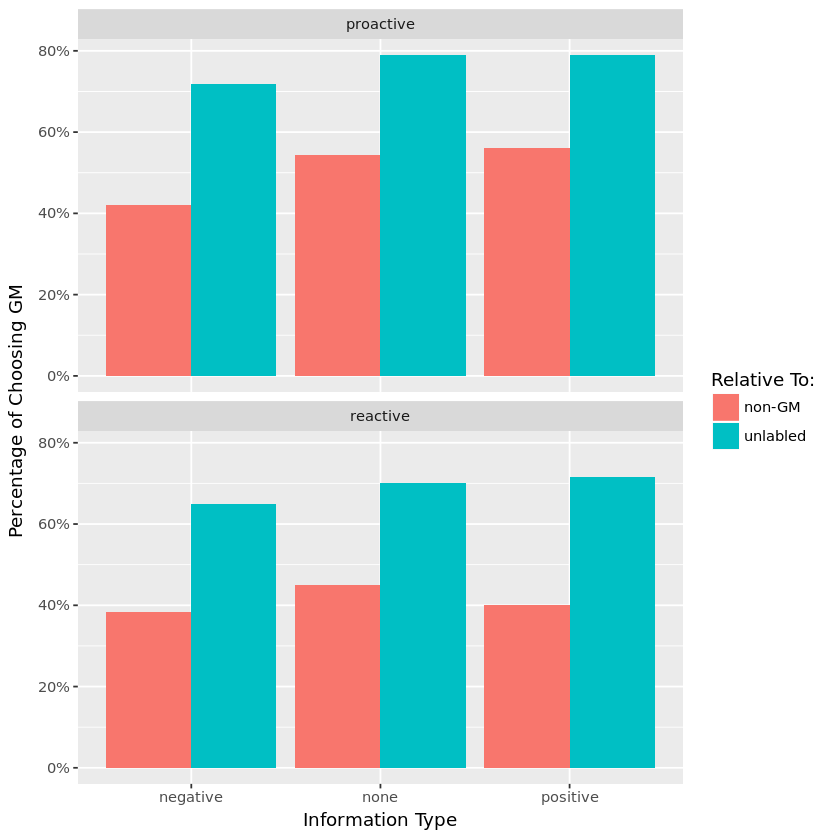

In [13]:
# make the actual plot!
library(scales)
ggplot(data = finalData, mapping = aes(x = informationType, y = value, fill=relativeTo)) +
  geom_bar(stat="identity", position=position_dodge()) +
  labs(x = "Information Type", y = "Percentage of Choosing GM") +
  guides(fill = guide_legend(title="Relative To:")) +
  facet_wrap(~ activity, nrow=2) +
  scale_y_continuous(labels = percent)

print("made it to checkpoint g")